<a href="https://colab.research.google.com/github/aniket-alt/Clustering_Assignment/blob/main/Task(f)_Time_Series_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.7/372.7 kB 7.7 MB/s eta 0:00:00


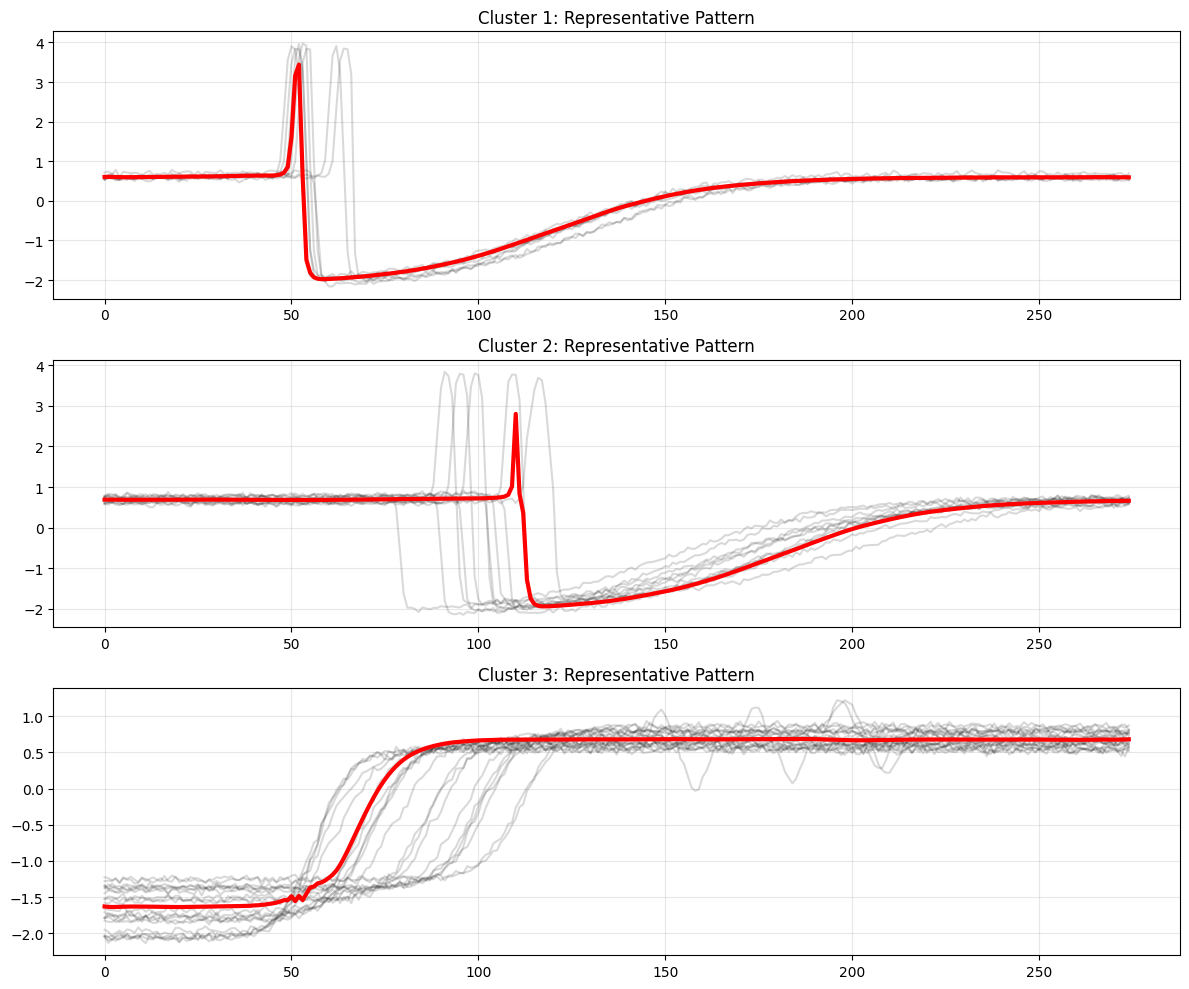

Final Model Inertia: 213721.7268


In [1]:
# 1. Install the specialized library for time-series
!pip install tslearn -q

import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# 2. LOAD DATA
# We load the 'Trace' dataset. It contains patterns of varying shapes.
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

# 3. PREPROCESS
# Scaling is vital in time-series so that 'amplitude' doesn't confuse the model.
# We want to group by 'shape', not just height.
scaler = TimeSeriesScalerMeanVariance()
X_scaled = scaler.fit_transform(X_train[:40])  # Taking first 40 samples for a clean visual

# 4. FIT THE MODEL
# We use 'softdtw' (Soft Dynamic Time Warping).
# It's more computationally expensive but MUCH more accurate for patterns.
n_clusters = 3
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="softdtw", max_iter=5, random_state=42)
labels = model.fit_predict(X_scaled)

# 5. VISUALIZATION
# We will plot each cluster to see if the "trends" actually look similar.
plt.figure(figsize=(12, 10))

for i in range(n_clusters):
    plt.subplot(n_clusters, 1, i + 1)
    # Plot the individual lines in the cluster (faded)
    for series in X_scaled[labels == i]:
        plt.plot(series.ravel(), "k-", alpha=0.15)

    # Plot the "Average Shape" (Centroid) of the cluster in red
    plt.plot(model.cluster_centers_[i].ravel(), "r-", linewidth=3)
    plt.title(f"Cluster {i+1}: Representative Pattern")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. QUALITY MEASURE
print(f"Final Model Inertia: {model.inertia_:.4f}")